In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

# to see column names: tobs, station, date, prcp, id
most_recent = session.query(Measurement).first()
most_recent.__dict__

session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]


'2017-08-23'

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# NO IDEA how to extract the date in date form instead of a string. So i'm brute forcing it.
latest_date = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
first_date = latest_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= first_date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.read_sql(precip.statement, engine)

precip_df.columns = ["date", "prcp"]

# Sort the dataframe by date
precip_df = precip_df.sort_values(by="date")

precip_df = precip_df.dropna()
precip_df

,date,prcp
0,2016-08-23,0.00
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


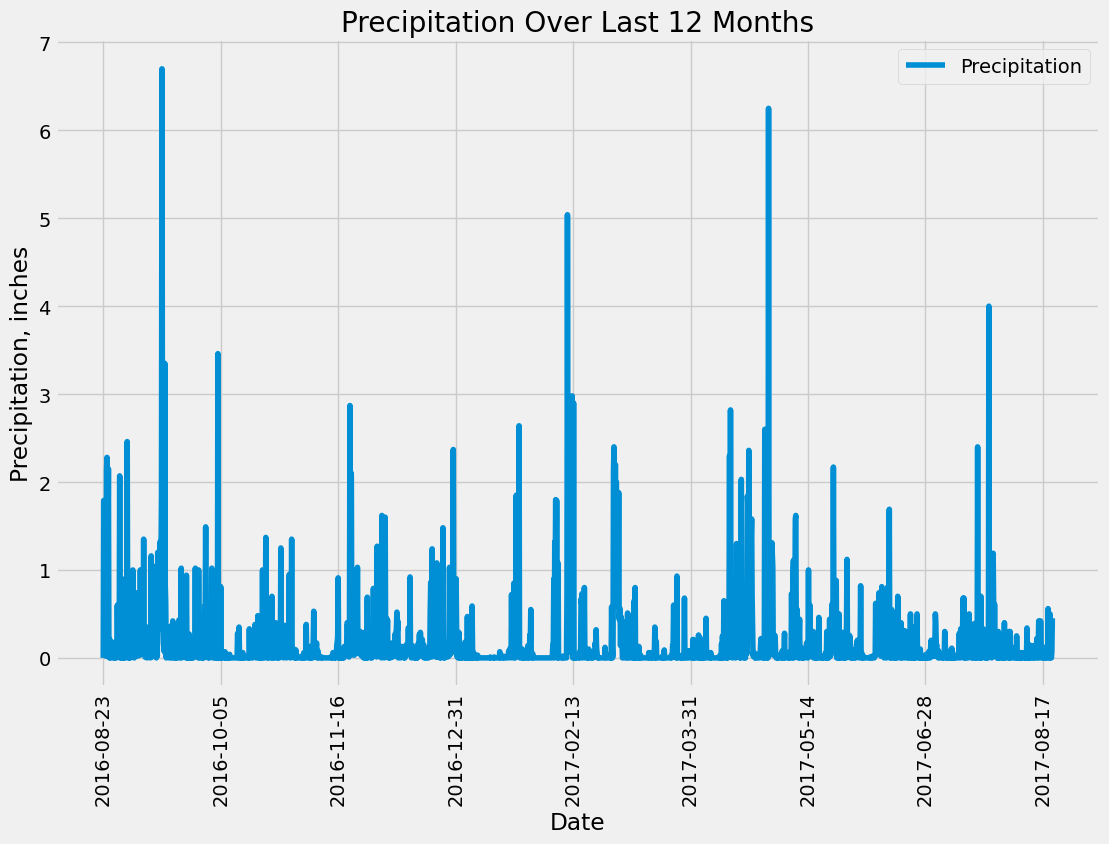

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data

ax = precip_df.plot("date", "prcp", label="Precipitation" ,xlabel="Date", ylabel="Precipitation, inches",
                    grid=True, title="Precipitation Over Last 12 Months", figsize=(12,8), rot=90)

plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset

# to find column names - station, name, longitude, id, latitude, elevation
stations = session.query(Station).first()

#count
sta_count = session.query(Station.station).count()
sta_count

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.prcp)).group_by(Measurement.station).\
    order_by(func.count(Measurement.prcp).desc()).all()


[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station=="USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

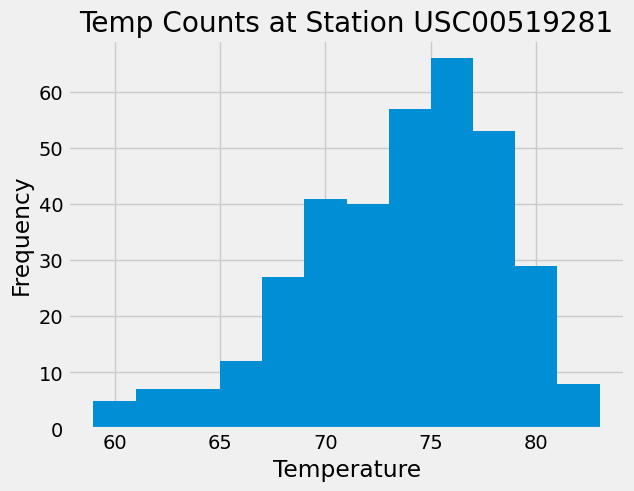

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp = session.query(Measurement.tobs).filter(Measurement.station=="USC00519281").\
    filter(Measurement.date >= first_date)

temp_df = pd.read_sql(temp.statement, engine)

temp_df = temp_df.dropna()

temp_df.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temp Counts at Station USC00519281")
plt.show()

In [18]:
# Close Session
session.close()